In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [3]:
data = pd.read_csv("thyroidDF.csv")
data.info()
data.isnull().sum()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [4]:
len(data['patient_id'])-len(data['patient_id'].drop_duplicates())

0

In [6]:
df = data.drop(['patient_id','referral_source','query_on_thyroxine','TBG','TBG_measured','FTI_measured','TT4_measured','T4U_measured','TSH_measured','T3_measured','T3'],axis=1) 

In [8]:
df = df.dropna()
df.info()
df.isnull().sum()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7652 entries, 18 to 9157
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7652 non-null   int64  
 1   sex                  7652 non-null   object 
 2   on_thyroxine         7652 non-null   object 
 3   on_antithyroid_meds  7652 non-null   object 
 4   sick                 7652 non-null   object 
 5   pregnant             7652 non-null   object 
 6   thyroid_surgery      7652 non-null   object 
 7   I131_treatment       7652 non-null   object 
 8   query_hypothyroid    7652 non-null   object 
 9   query_hyperthyroid   7652 non-null   object 
 10  lithium              7652 non-null   object 
 11  goitre               7652 non-null   object 
 12  tumor                7652 non-null   object 
 13  hypopituitary        7652 non-null   object 
 14  psych                7652 non-null   object 
 15  TSH                  7652 non-null   

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,TT4,T4U,FTI,target
18,63,F,t,f,t,f,f,f,f,f,f,f,f,f,f,68.00,48.0,1.02,47.0,F
19,36,F,f,f,f,f,f,f,t,t,f,f,f,f,f,1.50,90.0,1.06,85.0,-
21,40,F,f,f,f,f,f,f,f,f,f,f,f,f,f,1.20,104.0,1.08,96.0,-
22,40,F,f,f,f,f,f,f,f,f,f,f,f,f,f,5.90,88.0,0.84,105.0,-
23,77,F,f,f,f,f,f,f,f,f,f,f,f,f,f,0.05,107.0,1.13,95.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64,M,f,f,f,f,f,f,f,f,f,f,f,f,f,0.81,31.0,0.55,56.0,K
9154,16,M,f,f,f,f,f,f,f,f,f,f,f,f,f,2.60,122.0,0.86,142.0,-
9155,54,M,f,f,f,f,f,f,f,f,f,f,f,f,f,1.10,105.0,0.82,128.0,-
9156,78,M,f,f,f,f,f,f,f,f,f,f,f,f,f,0.97,97.0,0.73,133.0,-


In [20]:
# df = df[(np.abs(df['age']) < 100)]
# df = df[(np.abs(stats.zscore(df['TSH'])) < 3)]
# df = df[(np.abs(stats.zscore(df['FTI'])) < 3)]
# df = df[(np.abs(stats.zscore(df['TT4'])) < 3)]
df['target'].unique()

array(['F', '-', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'L', 'MK', 'A', 'Q',
       'J', 'C|I', 'O', 'H|K', 'GK', 'MI', 'KJ', 'P', 'FK', 'B', 'GI',
       'C', 'GKJ', 'OI', 'D'], dtype=object)

In [21]:
diagnoses = {'-': 'negative',
             'A': 'hyperthyroid', 
             'B': 'hyperthyroid', 
             'C': 'hyperthyroid', 
             'D': 'hyperthyroid',
             'E': 'hypothyroid', 
             'F': 'hypothyroid', 
             'G': 'hypothyroid', 
             'H': 'hypothyroid'}

df['target'] = df['target'].map(diagnoses)
df.dropna(subset=['target'], inplace=True)

In [22]:
df['target'].unique()

array(['hypothyroid', 'negative', 'hyperthyroid'], dtype=object)

In [28]:
df.replace('f', 0, inplace=True)
df.replace('t', 1, inplace=True)

df.replace('M', 0, inplace=True)
df.replace('F', 1, inplace=True)

In [29]:

X_data = df.iloc[:, :-1].values
y_data = df.iloc[:, -1].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state= 42)

<Axes: >

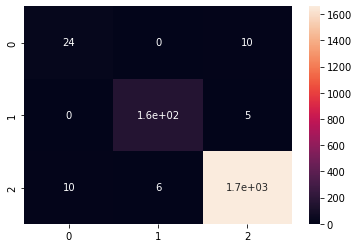

In [31]:
model = sklearn.tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
confusion = sklearn.metrics.confusion_matrix(y_test, pred)
sns.heatmap(confusion, annot=True)

IndexError: list index out of range

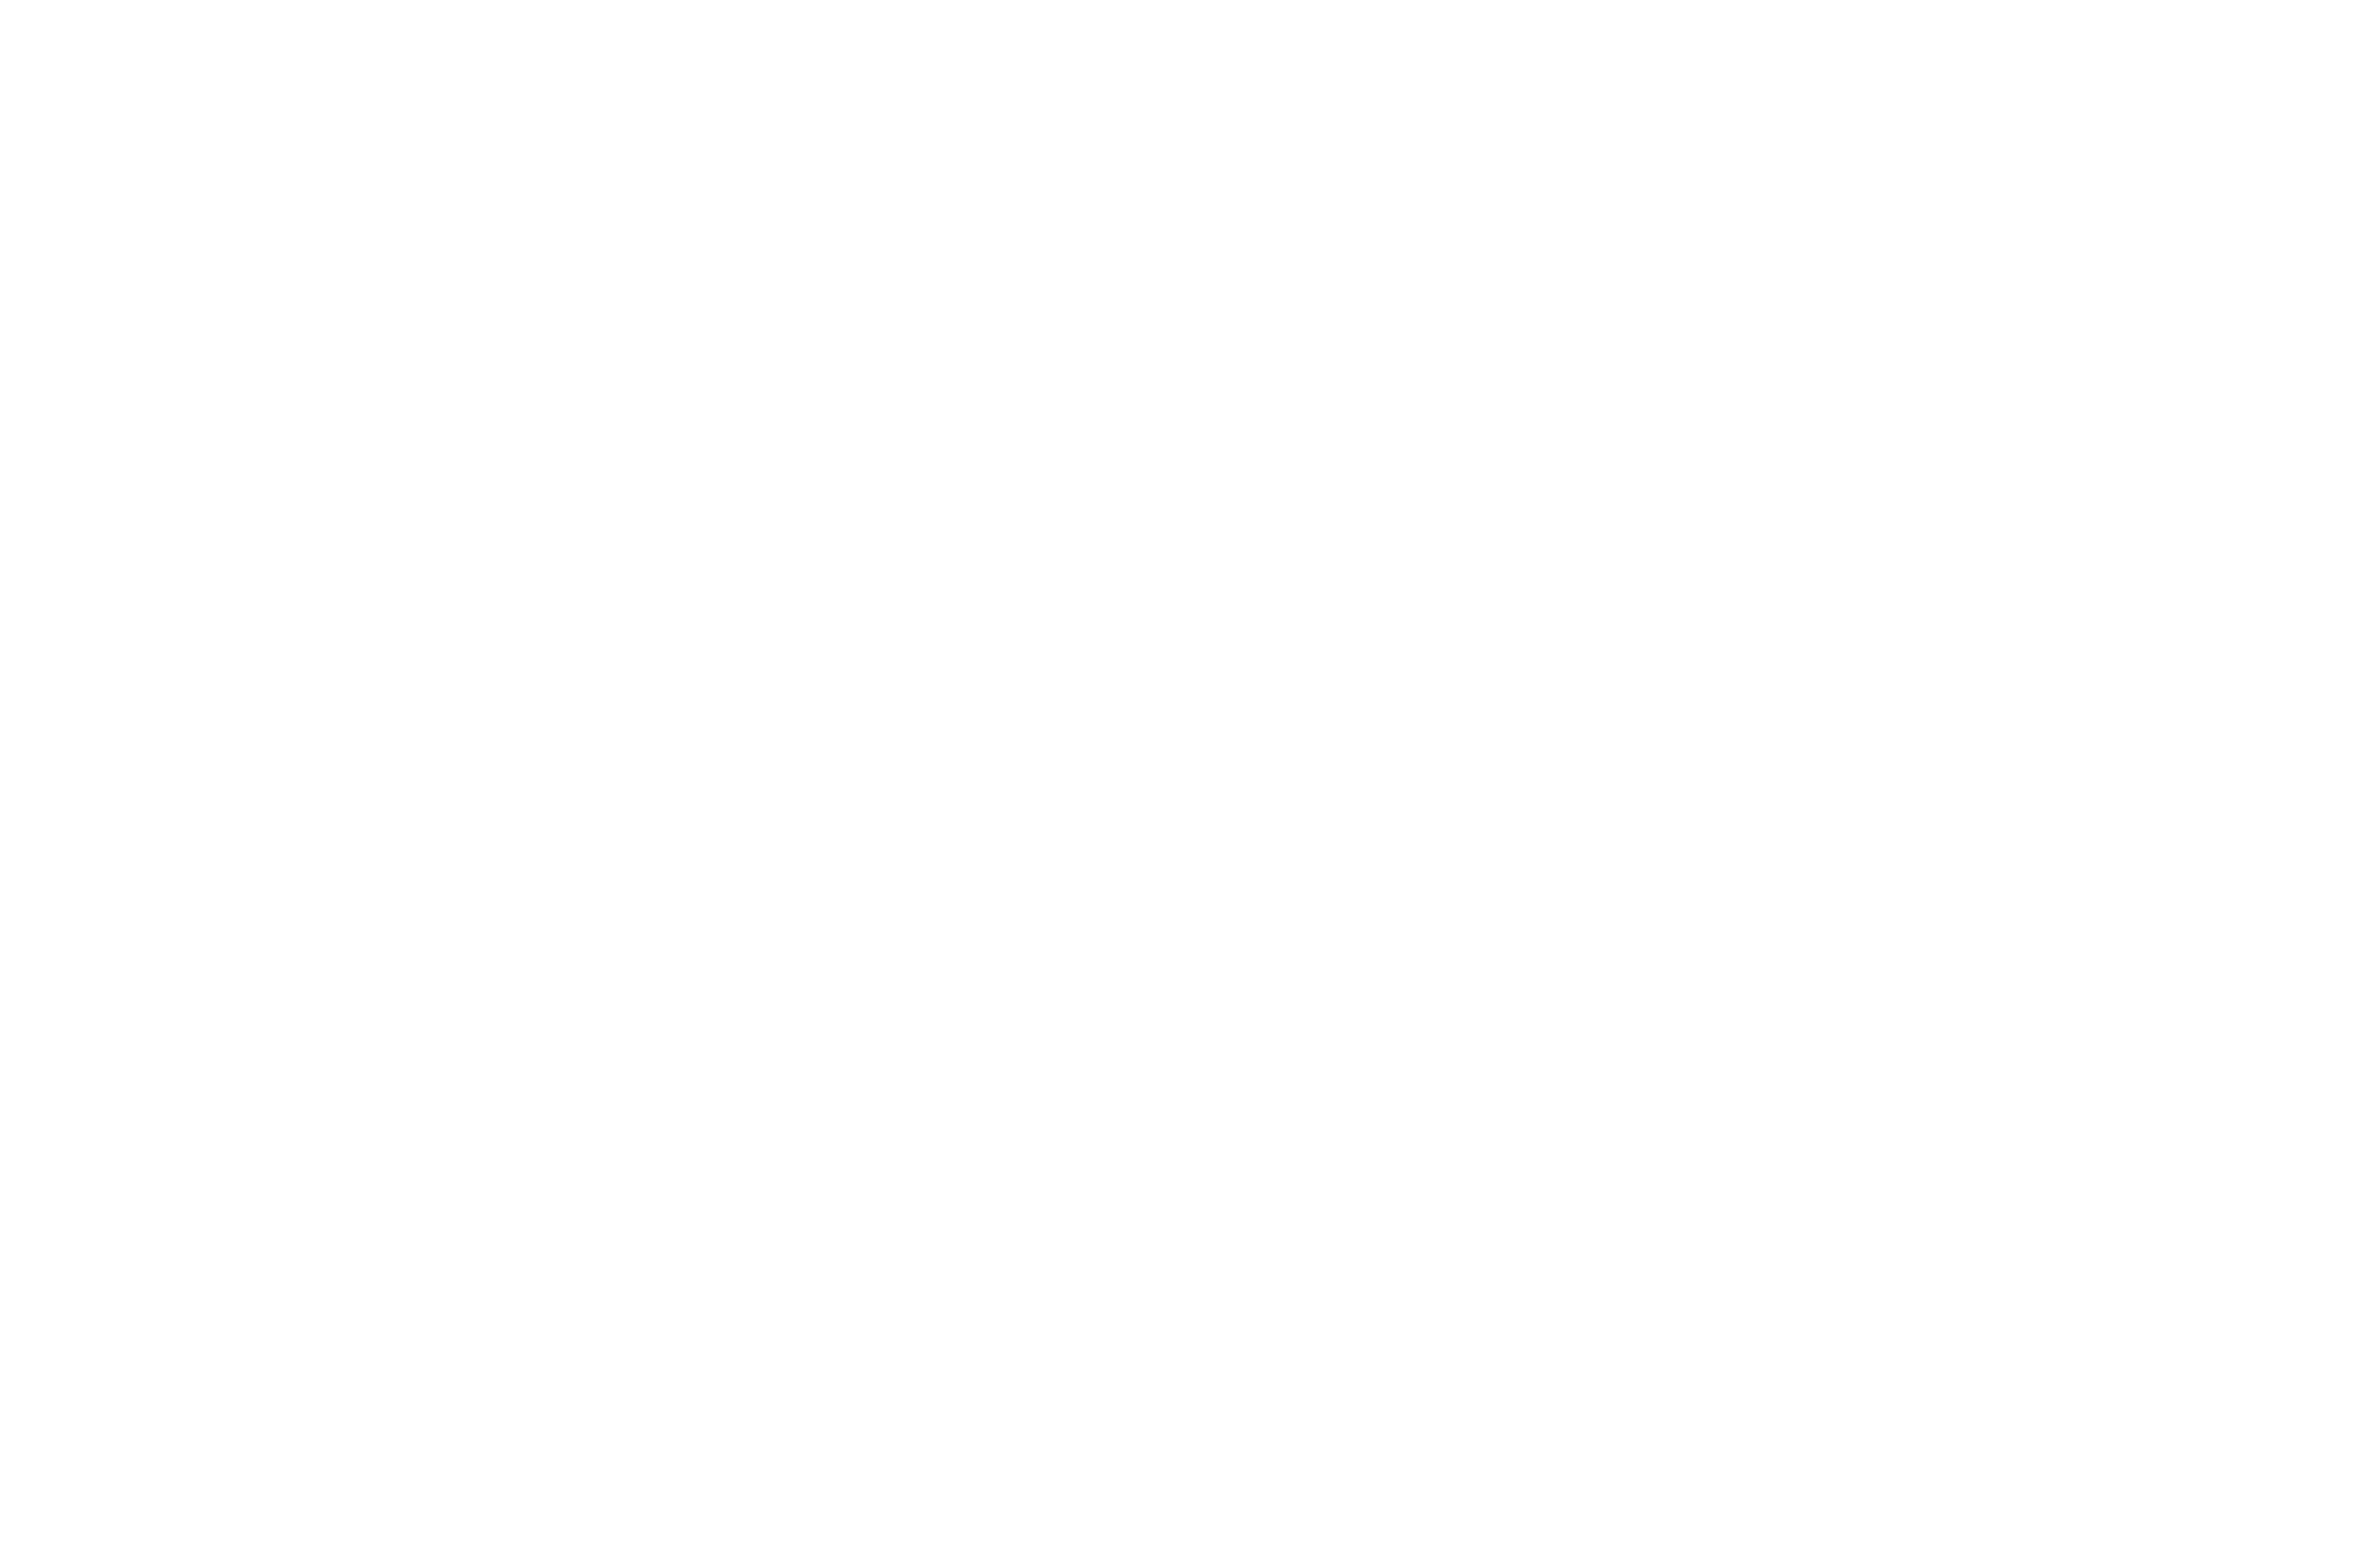

In [32]:
plt.figure(dpi=500)
sklearn.tree.plot_tree(model, feature_names=["age", "pain"], filled=True, class_names=["0", "1", "2"], label=None)